In [1]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:

# Step 2: Load the dataset
data = pd.read_excel('C:/Users/Prachi/Documents/Data Science Masters/Thesis/students_with_total_scores.xlsx')


In [3]:

# Step 3: Define feature columns (use 'answer classes' columns or 'punkte' columns)
feature_columns = [col for col in data.columns if  'punkte' in col.lower()]  # Adjust this list as per your column names
print(feature_columns)


['Punkte', 'Punkte.1', 'Punkte.2', 'Punkte.3', 'Punkte.4', 'Punkte.5', 'Punkte.6', 'Punkte.7', 'Punkte.8', 'Punkte.9', 'Punkte.10', 'Punkte.11', 'Punkte.12', 'Punkte.13', 'Punkte.14', 'Punkte.15', 'Punkte.16', 'Punkte.17', 'Punkte.18', 'Punkte.19', 'Punkte.20', 'Punkte.21', 'Punkte.22', 'Punkte.23', 'Punkte.24', 'Punkte.25', 'Punkte.26', 'Punkte.27', 'Punkte.28', 'Punkte.29', 'Punkte.30', 'Punkte.31', 'Punkte.32', 'Punkte.33', 'Punkte.34', 'Punkte.35', 'Punkte.36', 'Punkte.37', 'Punkte.38', 'Punkte.39', 'Punkte.40', 'Punkte.41', 'Punkte.42']


In [4]:
data['Pass_Fail'] = data['Total_Score'].apply(lambda x: 1 if x > 40 else 0)

In [4]:

# Step 4: Define the target column
target_column = 'Total_Score'

# Check for missing values
print(data.isnull().sum())
print(data)

# Fill missing values with 0 for all columns
data.fillna(0, inplace=True)

# Verify there are no missing values
print(data.isnull().sum())

Nummer          0
Scan-Nr.        0
Matr.-Nr.       0
1.1.1           1
Punkte         25
               ..
Punkte.41      14
7.1.5           0
Punkte.42      51
Total_Score     0
Pass_Fail       0
Length: 91, dtype: int64
     Nummer  Scan-Nr. Matr.-Nr.  1.1.1  Punkte  1.1.2.a  Punkte.1  1.1.2.b  \
0       341      5311  22696625    4.0     0.0      1.0       1.0      4.0   
1       343      5311  23013034    1.0     3.0      1.0       1.0      1.0   
2       330      5310  23076141    2.0     0.0      1.0       1.0      2.0   
3       342      5311  23138225    2.0     0.0      2.0       0.0      2.0   
4       345      5311  23208894    2.0     0.0      4.0       0.5      2.0   
..      ...       ...       ...    ...     ...      ...       ...      ...   
443     265      5303  23242190    2.0     0.0      1.0       1.0      5.0   
444     102      5287  23245075    4.0     0.0      1.0       1.0      2.0   
445     157      5292  2324636?    2.0     0.0      1.0       1.0      2.0 

In [5]:

# Step 5: Prepare the data
X_punkte = [col for col in data.columns if 'punkte' in col.lower()]
# Identify the columns with the naming pattern like '1.1.1' or '1.2' in the original data that need to be updated
X_ansclassns_to_update = [col for col in data.columns if any(part.isdigit() for part in col.split('.'))]
# Remove 'punkte' columns from the answer class columns to update
X_ansclassns_to_update = [col for col in X_ansclassns_to_update if col not in X_punkte]
print(len(X_ansclassns_to_update))
X = data[X_ansclassns_to_update]

y = data['Pass_Fail']



43


In [6]:
# Convert answer classes to strings to treat them as categorical variables
X = X.astype(str)

# Perform One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)

In [7]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)


In [8]:

from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy to fill missing values
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'

# Fit the imputer on the training data and transform it
X_imputed = imputer.fit_transform(X)
# Step 6: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)





In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")


Accuracy: 93.33%
Confusion Matrix:
[[96  3]
 [ 6 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        99
           1       0.91      0.83      0.87        36

    accuracy                           0.93       135
   macro avg       0.93      0.90      0.91       135
weighted avg       0.93      0.93      0.93       135



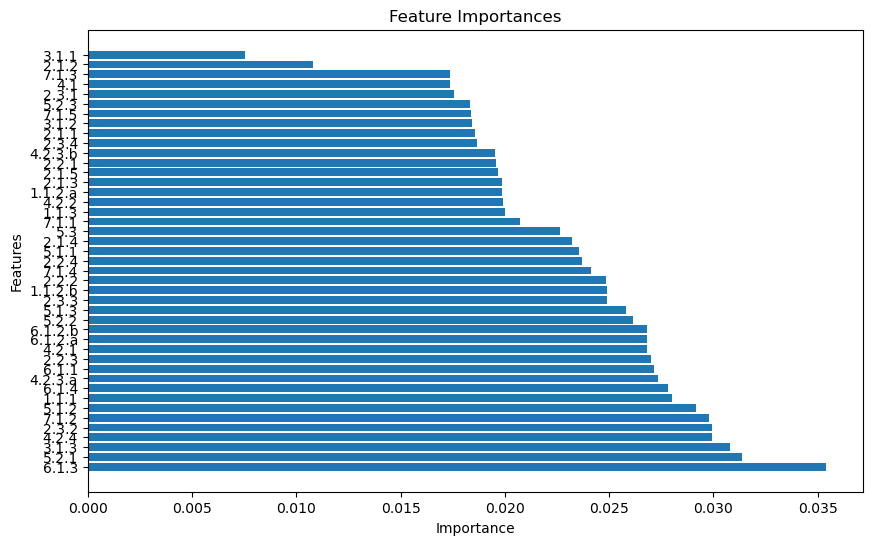

In [35]:


import matplotlib.pyplot as plt
import pandas as pd

# Fit the model
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
features = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
features = features.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features['Feature'], features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()


In [40]:
print(data)
print(data[X_ansclassns_to_update])

     Nummer  Scan-Nr. Matr.-Nr.  1.1.1  Punkte  1.1.2.a  Punkte.1  1.1.2.b  \
0         1      5276  23081417    2.0     0.0      4.0       1.0      2.0   
1         2      5276  23208324    4.0     0.0      1.0       0.0      4.0   
2         3      5276  23080950    1.0     0.0      1.0       0.0      1.0   
3         4      5276  23171914    2.0     0.0      2.0       0.0      2.0   
4         5      5276  23093804    4.0     0.0      2.0       1.0      2.0   
..      ...       ...       ...    ...     ...      ...       ...      ...   
443     444      5322  22538468    2.0     0.0      2.0       1.0      2.0   
444     445      5322  22296719    1.0     0.0      1.0       1.0      4.0   
445     446      5322  23150829    3.0     0.0      3.0       1.0      3.0   
446     447      5322  23229053    4.0     3.0      1.0       1.0      4.0   
447     448      5322  22735334    2.0     3.0      2.0       1.0      2.0   

     Punkte.2  1.1.3  ...  7.1.2  Punkte.39  7.1.3  Punkte.40  

In [45]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming the dataset is loaded into 'data' and contains features for answer classes and target 'Pass_Fail' column

# Step 1: Create a Random Forest model and fit it to find feature importance
rf_model = RandomForestClassifier(random_state=42)
X = data[X_ansclassns_to_update]  # Assuming 'Pass_Fail' is the target column
y = data['Pass_Fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Train the Random Forest model with the new features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
# Step 8: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 9: Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with combined and interaction features: {accuracy * 100:.2f}%")

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

# Step 2: Get the most important features from the model
importances = rf_model.feature_importances_
important_features = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
important_features = important_features.sort_values(by='Importance', ascending=False)

# Step 3: Select top 5 or 10 most important features (you can change this based on your analysis)
top_features = important_features['Feature'].head(10).values  # Taking top 10 important features

# Step 4: Create new features by combining related answer classes (e.g., summing or averaging them)
# For simplicity, let's create a new feature that sums the top 5 important features
data['combined_top_features'] = data[top_features[:5]].sum(axis=1)

# Step 5: Create interaction features by multiplying top features
# Example: Create pairwise interaction terms between top 3 important features
data['interaction_1'] = data[top_features[0]] * data[top_features[1]]
data['interaction_2'] = data[top_features[0]] * data[top_features[2]]
data['interaction_3'] = data[top_features[1]] * data[top_features[2]]

# Step 6: Now we have new features (combined and interaction features) to test
# Prepare the data again for training and testing
X_new = data[X_ansclassns_to_update]
y_new = data['Pass_Fail']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

# Step 7: Train the Random Forest model with the new features
rf_model_new = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_new.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = rf_model_new.predict(X_test)

# Step 9: Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with combined and interaction features: {accuracy * 100:.2f}%")

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")


Accuracy with combined and interaction features: 70.37%
Confusion Matrix:
[[95  1]
 [39  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.99      0.83        96
           1       0.00      0.00      0.00        39

    accuracy                           0.70       135
   macro avg       0.35      0.49      0.41       135
weighted avg       0.50      0.70      0.59       135

Accuracy with combined and interaction features: 71.11%
Confusion Matrix:
[[96  0]
 [39  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        96
           1       0.00      0.00      0.00        39

    accuracy                           0.71       135
   macro avg       0.36      0.50      0.42       135
weighted avg       0.51      0.71      0.59       135



c:\Users\Prachi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Prachi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Prachi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report





# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_model_new, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

# Cross-validation to check generalization
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%')

# Re-train the best model and make predictions
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)

# Evaluate the updated model
accuracy = accuracy_score(y_test, y_pred)
print(f'Improved Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Cross-Validation Accuracy: 78.91%
Improved Accuracy: 71.11%
Confusion Matrix:
[[96  0]
 [39  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        96
           1       0.00      0.00      0.00        39

    accuracy                           0.71       135
   macro avg       0.36      0.50      0.42       135
weighted avg       0.51      0.71      0.59       135



c:\Users\Prachi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Prachi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Prachi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the Random Forest model with balanced data
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the updated model
accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Accuracy with SMOTE: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\Prachi\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [4]:
import sklearn
import imblearn

print("scikit-learn version:", sklearn.__version__)
print("imblearn version:", imblearn.__version__)


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\Prachi\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [12]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X, y)


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\Prachi\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [18]:
import imblearn

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (c:\Users\Prachi\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)